## INTRO

Linear regression is one of the supervised ML model algorithms. It is especially best for data where the target variable is numeric and continuous.

### What is linear regression best used for?
Businesses use it to reliably and predictably convert raw data into business intelligence and actionable insights. Scientists in many fields, including biology and the behavioral, environmental, and social sciences, use linear regression to conduct preliminary data analysis and predict future trends.

If the goal is error (i.e variance) reduction in prediction or forecasting, linear regression can be used to fit a predictive model to an observed data set of values of the response (target/dependent) and explanatory (predictor/independent) variables.

#### BUSINESS PROBLEM 
Suppose we want to predict the price of a house based on a single feature – area

> •	Step 1: Collect data with house features and price
> 
•	Step 2: Fit a linear model to find the relationship between the ‘area’ feature and pri
> 
•	Step 3: Use this model to predict house prices for new data.


Since this is clearly a linear regression problem, we would build a linear regression model, train it, and test it. After which, we will deploy it and then use it to make predictions.

The following is the machine learning workflow involved here.


#### DATA COLLECTION/GATHERING

In [1]:
# importing relevant libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

In [2]:
# loading our dataset

df=pd.read_csv("homeprices.csv")

In [3]:
# taking a peek on how the loaded data looks like

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


#### DATA ASSESSMENT/CLEANING

We will not perform any cleaning operation as the two columns we need for our model building - `area` and `price` - are clean and tidy. 

#### EXPLORATORY DATA ANALYSIS (EDA)

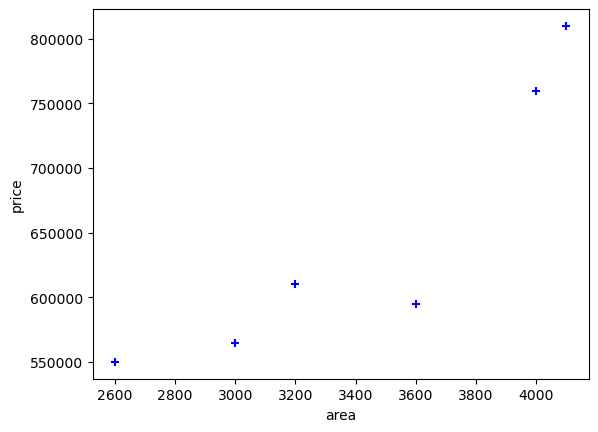

In [4]:
# visualizing our dataset on a scatterplot using matplotlib to see if there is a correlation between both variables

plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area, df.price, color="blue", marker="+")

as can be seen, there is a strong positive correlation. so we are good to go

#### MODEL BUILDING

In [5]:
# To avoid array mismatching issues, we create two new dataframes of 'price' and 'area' only 
# (extracting these from the main dataframe)

price_df=df.price
area_df = df.drop(["price", "bedrooms", "age"], axis=1)

In [6]:
# checking to see if both were properly created

price_df.head()

0    550000
1    565000
2    610000
3    595000
4    760000
Name: price, dtype: int64

In [7]:
area_df.head()

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
# associating a variable called reg to instantiate a linear regression object/function/model

reg = linear_model.LinearRegression()

#### MODEL TRAINING

In [10]:
# now we will use our reg.fit method on the two dataframes to train our linear regression 
# model/function, and then run the cell to train our model

reg.fit(area_df, price_df)

LinearRegression()

#### MODEL TESTING

In [11]:
# now that our model is trained, we will use it to predict results using the test set results, passing
# a random value for area, say 10,000 sq. km. To do this, we define a variable 'y_pred'

y_pred = reg.predict([[10000]])   # reg is now our trained model

# printing the results of y_pred to see the predicted price
y_pred

C:\Users\GCA\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1749787.84956606])

In [12]:
# again, we try on any random area value, say 2,600 sq.km

y_pred = reg.predict([[2600]])

# printing the results of y_pred to see the predicted price
y_pred

C:\Users\GCA\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([511697.20347155])

Now, let us manually try to calculate the predicted values by printing out the model's parameters (slope and intercept), so that we can substitute these in y = mx + c to get the predicted values of y when different values of x (area of house) are fed in.

In [13]:
# now we print out the cefficient of the regression model (that is, m, which is the slope/gradient of
# y = mx + c)

reg.coef_

array([167.30954677])

In [14]:
# printing out the intercept (that is, c in y = mx + c)

reg.intercept_

76692.3818707813

In [15]:
# now substituting into y = mx + c, using a random value of x = 2,600 like above (x is the predictor variable 
# `area`, while y is the target variable `price`.

y = 167.30954677*2600 + 76692.3818707813
print(y)

511697.2034727813

As can be clearly seen, the manual computation result and that from the linear regression are basically the same when rounded to 2dp (which is standard for currency).

Note that in this example, we skipped the step of splitting our dataset into train and test sets. We used the entire dataset to train and used a random set of values to test because we are not data-rich here. In a future example, we will demonstrate the splitting of datasets.

#### MODEL EVALUATION

We cannot evaluate this model at this time because we did not split our dataset into train and test sets.